<a href="https://colab.research.google.com/github/Deyonrose/labexercises/blob/AML/2348513_lab1_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay


In [ ]:
df=pd.read_csv('/content/Program1_dataset.csv')

In [ ]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.dtypes

Crime_Rate          float64
Zone_proportion     float64
Non_Retail_Acres    float64
CHAS                  int64
NOX                 float64
Avg_rooms           float64
AGE                 float64
Distance            float64
RAD                   int64
Property_TaxRate      int64
PTRATIO             float64
B                   float64
LSTAT               float64
MValue              float64
dtype: object

In [ ]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


<Axes: xlabel='Avg_rooms ', ylabel='MValue'>

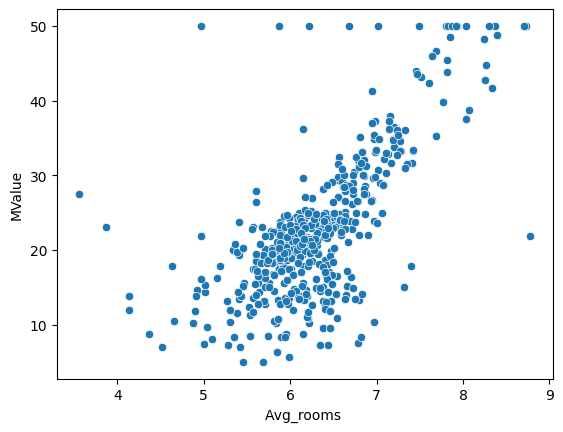

In [ ]:
sns.scatterplot(x=df['Avg_rooms '],y=df['MValue'])

In [ ]:
x= df.iloc[:, 0:13].values
y= df.iloc[:, 13].values

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state=0)

In [ ]:
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
regressor= LinearRegression()